In [ ]:
!pip install geopandas
!pip install pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 31.6 MB/s 
     |████████████████████████████████| 6.3 MB 54.0 MB/s 
     |████████████████████████████████| 16.7 MB 42.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 60 kB 7.9 MB/s 
     |████████████████████████████████| 5.7 MB 4.2 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 41 kB 583 kB/s 
     |████████████████████████████████| 147 kB 59.7 MB/s 
     |████████████████████████████████| 95 kB 3.8 MB/s 
     |████████████████████████████████| 46 kB 3.1 MB/s 
     |████████████████████████████████| 209 kB 57.8 MB/s 
     |████████████████████████████████| 2.4 MB 28.8 MB/s 
     |████████████████████████████████| 243 kB 46.6 MB/s 
  

In [ ]:
%matplotlib inline                 

# Import relevant packages  
import os                              # This provides several system utilities 
import pandas as pd                    # This is the workhorse of data munging in Python  
import seaborn as sns                  # This allows us to easily and beautifully plot  
import matplotlib.pyplot as plt        # This allows for basic plotting  
import numpy as np                     # This allows to perform computational measures
import geopandas as gpd                # This allows for pandas to deal with geodata
import pysal
from sklearn.cluster import KMeans
import pylab as plot

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
# the path to the file is defined
f='pca.xlsx'
# the data is read, where the first column has been chosen as the index column
data = pd.read_excel(f) 
#show first 5 rows of the dataframe
data.head()

,neighborhoodname,Neighborhood_Code,Districtcode,geometry,Districtname,Older_old,Young_children,Lone_parent,Mental_health_issues,Disability,...,Unemployment,Educational_level,Unwillingness_invest_EE,FAC1_1,FAC2_1,FAC3_1,FAC4_1,FAC5_1,FAC6_1,FAC7_1
0,Burgwallen-Oude Zijde,A00,A,"POLYGON ((4.902424 52.377147, 4.902422 52.3771...",A Centrum,73,4.2,110,8,9,...,4.9,10.0,54.0,-0.992299,-1.562433,0.510429,0.584438,-0.502336,1.049189,-0.134153
1,Burgwallen-Nieuwe Zijde,A01,A,"POLYGON ((4.891314 52.376324, 4.893913 52.3786...",A Centrum,72,4.0,72,8,8,...,3.8,9.0,55.0,-0.267543,-1.879960,-0.847539,0.938800,-0.826464,1.006000,-0.548693
2,Grachtengordel-West,A02,A,"POLYGON ((4.88478 52.376529, 4.888166 52.38021...",A Centrum,172,9.0,140,6,7,...,2.6,7.0,46.0,-0.834754,-0.792979,-1.581676,1.521132,0.096759,1.529266,-0.926090
3,Grachtengordel-Zuid,A03,A,"POLYGON ((4.893879 52.36729, 4.893938 52.36724...",A Centrum,150,10.1,117,6,7,...,3.0,9.0,41.0,-0.806603,-0.799018,-1.381023,0.829925,-0.272443,1.228380,-1.295938
4,Nieuwmarkt/Lastage,A04,A,"MULTIPOLYGON (((4.902909 52.376432, 4.903519 5...",A Centrum,386,7.9,356,7,12,...,6.9,11.0,49.0,-1.248274,-0.595685,0.051357,0.090228,1.011196,0.586390,-0.587034


In [ ]:
data=data.rename(columns={"Neighborhood_Code": "Wijkcode"})

In [ ]:
#Loading the spatial data for spatial mappin
df = gpd.read_file('geojson_lnglat.php.json', index_col=0)
#Showing the first 50 rows
df.head()

,Wijkcode,Wijknaam,Stadsdeelcode,Oppervlakte_m2,WijkID,geometry
0,T92,Amstel III/Bullewijk,T,5273638,03630012052066,"POLYGON ((4.94021 52.31934, 4.94035 52.31916, ..."
1,T93,"Bijlmer Centrum (D,F,H)",T,3158132,03630012052062,"POLYGON ((4.95676 52.32405, 4.96357 52.31660, ..."
2,T97,Gein,T,1921404,03630012052005,"POLYGON ((4.97990 52.30152, 4.98920 52.30155, ..."
3,T95,Nellestein,T,2281664,03630012052064,"MULTIPOLYGON (((4.99708 52.31487, 4.99652 52.3..."
4,SAE,Aetsveld,S,497034,03630970000004,"POLYGON ((5.03668 52.30237, 5.04112 52.30260, ..."


In [ ]:
#Deleting irrelevant neighboorhoods which are not part of the neighborhoods of Amsterdam according to its old 
#neighborhoods. The rows are inspected by scrolling through the entries and manually checking the irrelevant 
#neighborhoods.
df = df.drop(4)
df=df.drop(5)
df=df.drop(26)
df=df.drop(33)
df=df.drop(38)
df=df.drop(64)
df=df.drop(66)
df=df.drop(80)
df=df.drop(90)

In [ ]:
data_correct=df

In [ ]:
#checking the missing values for the spatial data
data_correct.isnull().sum()

Wijkcode          0
Wijknaam          0
Stadsdeelcode     0
Oppervlakte_m2    0
WijkID            0
geometry          0
dtype: int64

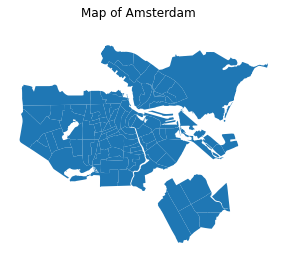

In [ ]:
# Plotting the map of Amsterdam to gain insights into the spatial distribution of 
#the 98 neighborhoods of Amsterdam

# Setup figure and axis
f, ax = plt.subplots(1)
# Adding the layer of polygons on the axis
data_correct.plot(ax=ax)
# Setting the figure title
f.suptitle('Map of Amsterdam')
# setting the axis off and displaying the map
ax.set_axis_off()
plt.show()

In [ ]:
#To connect the vulnerability variables to the spatial data, the two dataframes are merged on 'WIjkcode'
outer_merged = pd.merge(data_correct, data, how="outer", on=["Wijkcode"])
#Show the first 5 rows of the merged data
outer_merged.head()

,Wijkcode,Wijknaam,Stadsdeelcode,Oppervlakte_m2,WijkID,geometry_x,neighborhoodname,Districtcode,geometry_y,Districtname,...,Unemployment,Educational_level,Unwillingness_invest_EE,FAC1_1,FAC2_1,FAC3_1,FAC4_1,FAC5_1,FAC6_1,FAC7_1
0,T92,Amstel III/Bullewijk,T,5273638,03630012052066,"POLYGON ((4.94021 52.31934, 4.94035 52.31916, ...",Amstel III/Bullewijk,T,"POLYGON ((4.94021 52.319335, 4.940353 52.31916...",T Zuidoost,...,5.0,15.0,54.831325,-0.985860,-1.147053,0.834754,-0.699774,-0.310328,1.397064,0.595322
1,T93,"Bijlmer Centrum (D,F,H)",T,3158132,03630012052062,"POLYGON ((4.95676 52.32405, 4.96357 52.31660, ...","Bijlmer-Centrum (D,F,H)",T,"POLYGON ((4.956755 52.324046, 4.963566 52.3165...",T Zuidoost,...,14.0,39.0,70.000000,2.358491,-1.611044,0.436096,-0.351738,2.320253,1.403811,1.797763
2,T97,Gein,T,1921404,03630012052005,"POLYGON ((4.97990 52.30152, 4.98920 52.30155, ...",Gein,T,"POLYGON ((4.979897 52.301515, 4.989202 52.3015...",T Zuidoost,...,11.4,34.0,57.000000,0.439362,1.117197,0.093526,-1.044383,0.619059,0.432042,0.291591
3,T95,Nellestein,T,2281664,03630012052064,"MULTIPOLYGON (((4.99708 52.31487, 4.99652 52.3...",Nellestein,T,"MULTIPOLYGON (((4.997077 52.314868, 4.996518 5...",T Zuidoost,...,6.4,20.0,49.000000,-1.066638,1.475058,0.696964,-0.598894,0.092049,1.498126,-1.340790
4,F83,De Punt,F,599615,03630012052024,"POLYGON ((4.77729 52.35723, 4.77745 52.35720, ...",De Punt,F,"POLYGON ((4.777285 52.357227, 4.777454 52.3572...",F Nieuw-West,...,11.3,37.0,68.000000,1.258207,0.344221,0.047932,1.041658,-0.950948,0.195857,0.260983


In [ ]:
outer_merged.isnull().sum()

Wijkcode                           0
Wijknaam                           0
Stadsdeelcode                      0
Oppervlakte_m2                     0
WijkID                             0
geometry_x                         0
neighborhoodname                   0
Districtcode                       0
geometry_y                         0
Districtname                       0
Older_old                          0
Young_children                     0
Lone_parent                        0
Mental_health_issues               0
Disability                         0
Precarious                         0
Proficiency_in_Dutch               0
Ethnicity                          0
Large_household_size               0
Private_renting                    0
Social_housing_renting             0
Gender                             0
Energy_inefficient_property        0
Old_heating_system                 0
No_solar_panels                    0
No_income                          0
Retired                            0
P

In [ ]:
#not needed
del outer_merged['WijkID']
#not needed
del outer_merged['Oppervlakte_m2']
#Double info
del outer_merged['Wijknaam']
del outer_merged['geometry_y']


In [ ]:
outer_merged=outer_merged.set_index('neighborhoodname')
outer_merged.head()

,Wijkcode,Stadsdeelcode,geometry_x,Districtcode,Districtname,Older_old,Young_children,Lone_parent,Mental_health_issues,Disability,...,Unemployment,Educational_level,Unwillingness_invest_EE,FAC1_1,FAC2_1,FAC3_1,FAC4_1,FAC5_1,FAC6_1,FAC7_1
neighborhoodname,,,,,,,,,,,,,,,,,,,,,
Amstel III/Bullewijk,T92,T,"POLYGON ((4.94021 52.31934, 4.94035 52.31916, ...",T,T Zuidoost,1,0.6,4,12,6,...,5.0,15.0,54.831325,-0.985860,-1.147053,0.834754,-0.699774,-0.310328,1.397064,0.595322
"Bijlmer-Centrum (D,F,H)",T93,T,"POLYGON ((4.95676 52.32405, 4.96357 52.31660, ...",T,T Zuidoost,348,10.5,2036,12,20,...,14.0,39.0,70.000000,2.358491,-1.611044,0.436096,-0.351738,2.320253,1.403811,1.797763
Gein,T97,T,"POLYGON ((4.97990 52.30152, 4.98920 52.30155, ...",T,T Zuidoost,195,18.4,885,8,18,...,11.4,34.0,57.000000,0.439362,1.117197,0.093526,-1.044383,0.619059,0.432042,0.291591
Nellestein,T95,T,"MULTIPOLYGON (((4.99708 52.31487, 4.99652 52.3...",T,T Zuidoost,138,11.3,167,7,15,...,6.4,20.0,49.000000,-1.066638,1.475058,0.696964,-0.598894,0.092049,1.498126,-1.340790
De Punt,F83,F,"POLYGON ((4.77729 52.35723, 4.77745 52.35720, ...",F,F Nieuw-West,213,22.8,235,10,20,...,11.3,37.0,68.000000,1.258207,0.344221,0.047932,1.041658,-0.950948,0.195857,0.260983


In [ ]:
outer_merged=outer_merged.rename(columns={ 'geometry_x' : 'geometry', 'FAC1_1':'Component_1', 'FAC2_1':'Component_2',  'FAC3_1' : 'Component_3', 'FAC4_1' : 'Component_4', 'FAC5_1' : 'Component_5' , 'FAC6_1' : 'Component_6' , 'FAC7_1' : 'Component_7' })
outer_merged.head()

,Wijkcode,Stadsdeelcode,geometry,Districtcode,Districtname,Older_old,Young_children,Lone_parent,Mental_health_issues,Disability,...,Unemployment,Educational_level,Unwillingness_invest_EE,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7
neighborhoodname,,,,,,,,,,,,,,,,,,,,,
Amstel III/Bullewijk,T92,T,"POLYGON ((4.94021 52.31934, 4.94035 52.31916, ...",T,T Zuidoost,1,0.6,4,12,6,...,5.0,15.0,54.831325,-0.985860,-1.147053,0.834754,-0.699774,-0.310328,1.397064,0.595322
"Bijlmer-Centrum (D,F,H)",T93,T,"POLYGON ((4.95676 52.32405, 4.96357 52.31660, ...",T,T Zuidoost,348,10.5,2036,12,20,...,14.0,39.0,70.000000,2.358491,-1.611044,0.436096,-0.351738,2.320253,1.403811,1.797763
Gein,T97,T,"POLYGON ((4.97990 52.30152, 4.98920 52.30155, ...",T,T Zuidoost,195,18.4,885,8,18,...,11.4,34.0,57.000000,0.439362,1.117197,0.093526,-1.044383,0.619059,0.432042,0.291591
Nellestein,T95,T,"MULTIPOLYGON (((4.99708 52.31487, 4.99652 52.3...",T,T Zuidoost,138,11.3,167,7,15,...,6.4,20.0,49.000000,-1.066638,1.475058,0.696964,-0.598894,0.092049,1.498126,-1.340790
De Punt,F83,F,"POLYGON ((4.77729 52.35723, 4.77745 52.35720, ...",F,F Nieuw-West,213,22.8,235,10,20,...,11.3,37.0,68.000000,1.258207,0.344221,0.047932,1.041658,-0.950948,0.195857,0.260983


In [ ]:
outer_merged.columns

Index(['Wijkcode', 'Stadsdeelcode', 'geometry', 'Districtcode', 'Districtname',
       'Older_old', 'Young_children', 'Lone_parent', 'Mental_health_issues',
       'Disability', 'Precarious', 'Proficiency_in_Dutch', 'Ethnicity',
       'Large_household_size', 'Private_renting', 'Social_housing_renting',
       'Gender', 'Energy_inefficient_property', 'Old_heating_system',
       'No_solar_panels', 'No_income', 'Retired', 'Provision_of_unpaid_care',
       'Loneliness', 'Debt_assistance', 'Energy_consumption',
       'Shared_property', 'Under_occupancy', 'Full_time_student',
       'Satisfaction_rate_communication', 'Social_participation',
       'Unemployment', 'Educational_level', 'Unwillingness_invest_EE',
       'Component_1', 'Component_2', 'Component_3', 'Component_4',
       'Component_5', 'Component_6', 'Component_7'],
      dtype='object')

In [ ]:
pca_components= outer_merged[[ 'Component_1', 'Component_2', 'Component_3', 'Component_4',
       'Component_5', 'Component_6', 'Component_7']]

In [ ]:
#fit the k-means model
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pca_components)
    distortions.append(kmeanModel.inertia_)

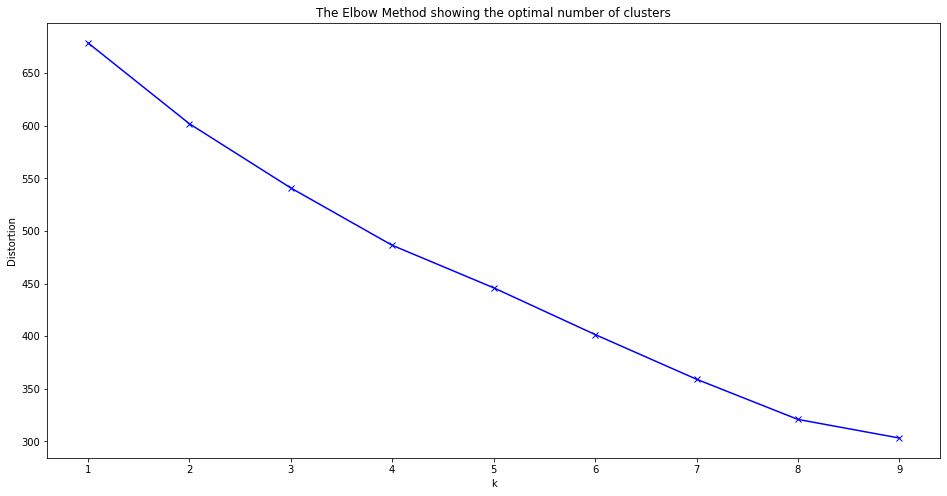

In [ ]:
#plot the elbow method plot to show the optimal number of clusters
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

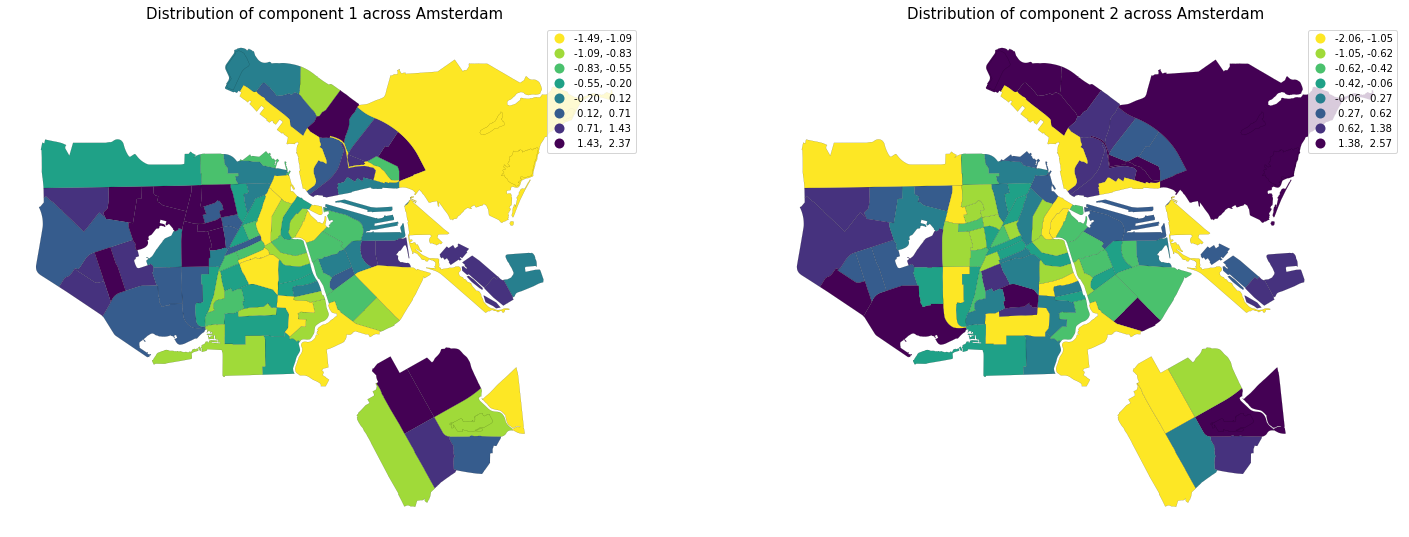

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Component_1", k=8, scheme= 'quantiles' , cmap='viridis_r', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of component 1 across Amsterdam', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= 'Component_2', k=8, scheme= 'quantiles' , legend = True, cmap='viridis_r', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of component 2 across Amsterdam', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()
#ax1 = plt.savefig("Distribution of Older Olds Across Amsterdam.png")

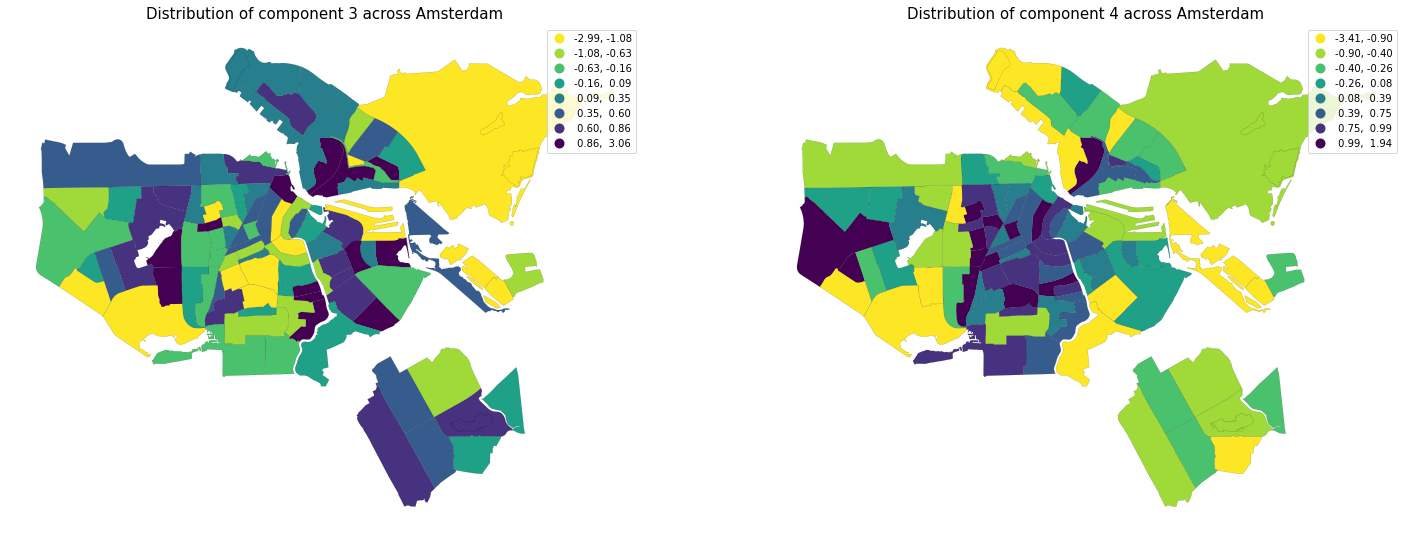

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Component_3", k=8, scheme= 'quantiles' , cmap='viridis_r', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of component 3 across Amsterdam', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= 'Component_4', k=8, scheme= 'quantiles' , legend = True, cmap='viridis_r', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of component 4 across Amsterdam', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()
#ax1 = plt.savefig("Distribution of Older Olds Across Amsterdam.png")

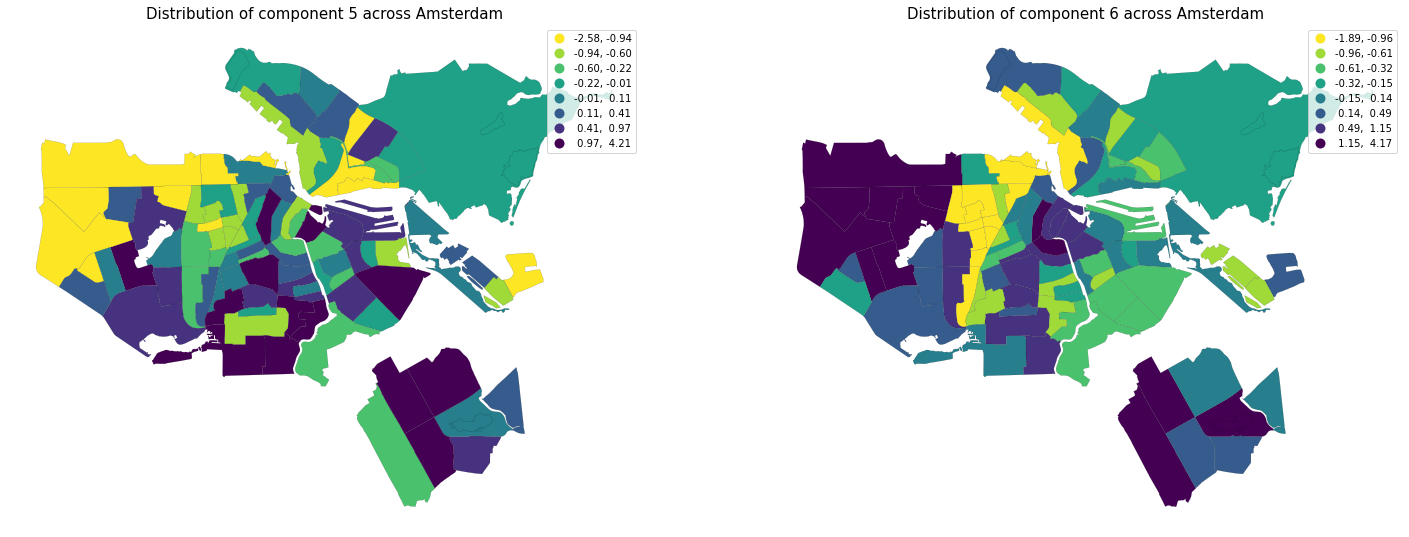

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Component_5", k=8, scheme= 'quantiles' , cmap='viridis_r', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of component 5 across Amsterdam', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= 'Component_6', k=8, scheme= 'quantiles' , legend = True, cmap='viridis_r', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of component 6 across Amsterdam', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()
#ax1 = plt.savefig("Distribution of Older Olds Across Amsterdam.png")

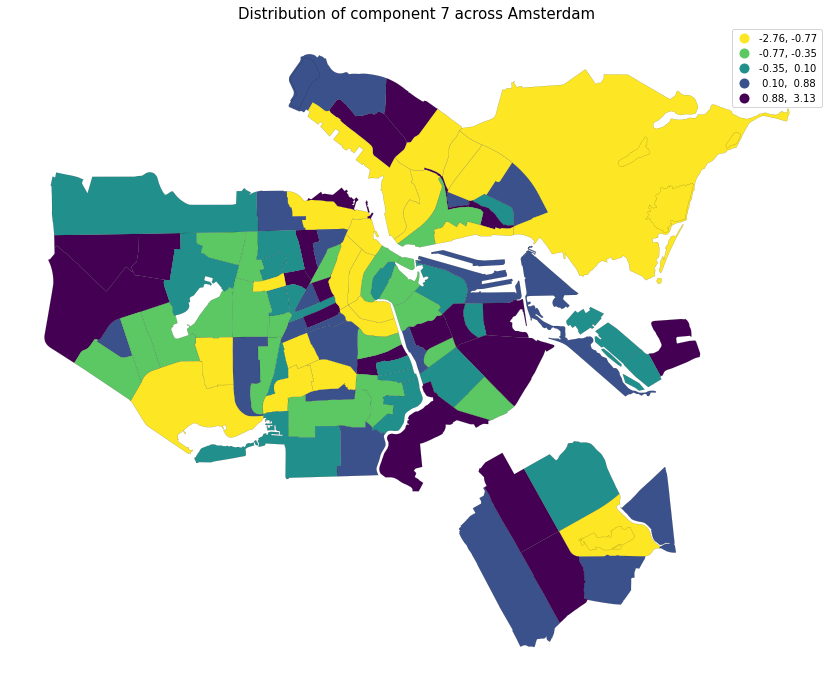

In [ ]:
#ESDA plots
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Component_7", k=5, scheme= 'quantiles' , cmap='viridis_r', alpha=1, edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of component 7 across Amsterdam', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()